In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import integrate
from scipy.special import roots_legendre
## df

In [67]:
def f(x, k):
    return 0.5 * k * x**2

In [68]:
def primitiva_f(x, k):
    """Função primitiva de f(x): F(x) = (1/6)kx³"""
    return (k/6) * x**3

In [69]:
def regra_trapezio(func, a, b, n, k):
    """Implementa a regra do trapézio para integração numérica"""
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x, k)
    
    # Aplicar regra do trapézio
    integral = h * (0.5*y[0] + np.sum(y[1:-1]) + 0.5*y[-1])
    return integral

In [70]:
def regra_simpson(func, a, b, n, k):
    """Implementa a regra de Simpson para integração numérica"""
    if n % 2 != 0:
        n += 1  # Garantir que n seja par
    
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x, k)
    
    # Aplicar regra de Simpson
    integral = h/3 * (y[0] + 4*np.sum(y[1::2]) + 2*np.sum(y[2:-1:2]) + y[-1])
    return integral

In [71]:
def simpson_adaptativo(func, a, b, k, epsilon=1e-6, n_inicial=2):
    """Implementa o método adaptativo de Simpson"""
    resultados = []
    n = n_inicial
    
    while True:
        # Calcular integral com n subintervalos
        I_n = regra_simpson(func, a, b, n, k)
        
        # Calcular integral com 2n subintervalos
        I_2n = regra_simpson(func, a, b, 2*n, k)
        
        # Estimar erro usando Richardson
        erro_estimado = abs(I_2n - I_n) / 15
        
        resultados.append({
            'n': n,
            'integral': I_2n,
            'erro_estimado': erro_estimado
        })
        
        print(f"n = {n:4d}, Integral = {I_2n:.8f}, Erro estimado = {erro_estimado:.2e}")
        
        if erro_estimado < epsilon:
            break
            
        n *= 2
        
        if n > 10000:  # Evitar loop infinito
            print("Atingido limite máximo de iterações")
            break
    
    return resultados

In [72]:
def calcular_primitiva_simbolica():
    """
    Calcula a primitiva da função f(x) = (1/2)kx² usando SymPy
    """
    print("="*60)
    print("CÁLCULO SIMBÓLICO DA PRIMITIVA")
    print("="*60)
    
    # Definir símbolos
    x, k = sp.symbols('x k', real=True, positive=True)
    
    # Definir a função f(x) = (1/2)kx²
    f = sp.Rational(1, 2) * k * x**2
    
    print(f"Função original: f(x) = {f}")
    
    # Calcular a primitiva (integral indefinida)
    primitiva = sp.integrate(f, x)
    
    print(f"Primitiva F(x) = ∫f(x)dx = {primitiva}")
    
    # Simplificar a expressão
    primitiva_simplificada = sp.simplify(primitiva)
    print(f"Primitiva simplificada: F(x) = {primitiva_simplificada}")
    
    # Verificar derivando a primitiva
    derivada = sp.diff(primitiva, x)
    derivada_simplificada = sp.simplify(derivada)
    
    print(f"\nVerificação - dF/dx = {derivada_simplificada}")
    print(f"Função original:     {f}")
    print(f"Verificação: dF/dx = f(x)? {sp.simplify(derivada - f) == 0}")
    
    return f, primitiva, primitiva_simplificada

In [73]:
def calcular_integral_definida_simbolica():
    """
    Calcula a integral definida usando a primitiva simbólica
    """
    print("\n" + "="*60)
    print("CÁLCULO DA INTEGRAL DEFINIDA")
    print("="*60)
    
    # Definir símbolos
    x, k = sp.symbols('x k', real=True, positive=True)
    
    # Função e primitiva
    f = sp.Rational(1, 2) * k * x**2
    primitiva = sp.Rational(1, 6) * k * x**3
    
    # Limites de integração
    a, b = 0, sp.Rational(1, 5)  # 0 a 0.2 = 1/5
    
    print(f"Calculando ∫[{a} a {b}] f(x) dx")
    print(f"onde f(x) = {f}")
    print(f"e F(x) = {primitiva}")
    
    # Calcular usando o Teorema Fundamental do Cálculo
    integral_definida = primitiva.subs(x, b) - primitiva.subs(x, a)
    
    print(f"\nPelo Teorema Fundamental do Cálculo:")
    print(f"∫[{a} a {b}] f(x) dx = F({b}) - F({a})")
    print(f"                    = {primitiva.subs(x, b)} - {primitiva.subs(x, a)}")
    print(f"                    = {integral_definida}")
    
    # Substituir k = 200
    k_valor = 200
    resultado_numerico = integral_definida.subs(k, k_valor)
    
    print(f"\nCom k = {k_valor} N/m:")
    print(f"∫[0 a 0.2] f(x) dx = {resultado_numerico}")
    print(f"                   = {float(resultado_numerico):.8f} J")
    
    # Verificar usando integração direta do SymPy
    integral_direta = sp.integrate(f, (x, a, b))
    resultado_direto = integral_direta.subs(k, k_valor)
    
    print(f"\nVerificação com integração direta:")
    print(f"∫[0 a 0.2] f(x) dx = {resultado_direto}")
    print(f"                   = {float(resultado_direto):.8f} J")
    
    print(f"\nDiferença entre métodos: {abs(float(resultado_numerico - resultado_direto))}")
    
    return resultado_numerico, resultado_direto

In [74]:
def comparar_com_implementacao_numerica():
    """
    Compara o resultado simbólico com a implementação numérica
    """
    print("\n" + "="*60)
    print("COMPARAÇÃO COM MÉTODOS NUMÉRICOS")
    print("="*60)
    
    # Valor exato simbólico
    k = 200
    valor_exato = k * (0.2)**3 / 6
    
    print(f"Valor exato (simbólico): {valor_exato:.10f} J")
    
    # Implementação numérica da regra de Simpson
    def f_numerica(x):
        return 0.5 * k * x**2
    
    def simpson_numerica(func, a, b, n):
        if n % 2 != 0:
            n += 1
        h = (b - a) / n
        x = np.linspace(a, b, n+1)
        y = func(x)
        return h/3 * (y[0] + 4*np.sum(y[1::2]) + 2*np.sum(y[2:-1:2]) + y[-1])
    
    # Testar diferentes valores de n
    valores_n = [10, 100, 1000, 10000]
    
    print("\nComparação com Simpson numérico:")
    print("n\t\tResultado\t\tErro Absoluto")
    print("-" * 50)
    
    for n in valores_n:
        resultado_simpson = simpson_numerica(f_numerica, 0, 0.2, n)
        erro = abs(resultado_simpson - valor_exato)
        print(f"{n:6d}\t\t{resultado_simpson:.10f}\t{erro:.2e}")
    
    return valor_exato

In [75]:
def visualizar_funcao_e_primitiva():
    """
    Cria gráficos da função e sua primitiva
    """
    print("\n" + "="*60)
    print("VISUALIZAÇÃO DA FUNÇÃO E PRIMITIVA")
    print("="*60)
    
    # Parâmetros
    k = 200
    x = np.linspace(0, 0.3, 1000)
    
    # Função original e primitiva
    f_x = 0.5 * k * x**2
    F_x = k * x**3 / 6
    
    # Criar gráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Gráfico da função f(x)
    ax1.plot(x, f_x, 'b-', linewidth=2, label='f(x) = ½kx²')
    ax1.fill_between(x[x <= 0.2], f_x[x <= 0.2], alpha=0.3, color='blue', 
                     label='Área = ∫₀^{0.2} f(x)dx')
    ax1.axvline(x=0.2, color='red', linestyle='--', alpha=0.7, label='x = 0.2 m')
    ax1.set_xlabel('Posição x (m)')
    ax1.set_ylabel('f(x) = Energia Potencial (J)')
    ax1.set_title('Função de Energia Potencial Elástica')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Gráfico da primitiva F(x)
    ax2.plot(x, F_x, 'r-', linewidth=2, label='F(x) = ⅙kx³')
    ax2.axvline(x=0.2, color='red', linestyle='--', alpha=0.7, label='x = 0.2 m')
    ax2.axhline(y=F_x[np.argmin(np.abs(x - 0.2))], color='green', 
                linestyle=':', alpha=0.7, label=f'F(0.2) = {F_x[np.argmin(np.abs(x - 0.2))]:.4f} J')
    ax2.set_xlabel('Posição x (m)')
    ax2.set_ylabel('F(x) = Primitiva')
    ax2.set_title('Primitiva da Função (Energia Acumulada)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig('primitiva_simbolica.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Gráfico salvo como 'primitiva_simbolica.png'")

In [76]:
def demonstracao_teorema_fundamental():
    """
    Demonstra o Teorema Fundamental do Cálculo passo a passo
    """
    print("\n" + "="*60)
    print("DEMONSTRAÇÃO DO TEOREMA FUNDAMENTAL DO CÁLCULO")
    print("="*60)
    
    print("O Teorema Fundamental do Cálculo estabelece que:")
    print("Se F(x) é uma primitiva de f(x), então:")
    print("∫[a,b] f(x) dx = F(b) - F(a)")
    print()
    
    # Usando SymPy para demonstração simbólica
    x, k, a, b = sp.symbols('x k a b', real=True)
    
    # Função e primitiva
    f = sp.Rational(1, 2) * k * x**2
    F = sp.Rational(1, 6) * k * x**3
    
    print(f"Para nossa função: f(x) = {f}")
    print(f"Primitiva: F(x) = {F}")
    print()
    
    print("Verificação que F'(x) = f(x):")
    derivada = sp.diff(F, x)
    print(f"F'(x) = d/dx({F}) = {derivada}")
    print(f"f(x) = {f}")
    print(f"F'(x) = f(x)? {sp.simplify(derivada - f) == 0} ✓")
    print()
    
    print("Aplicando o teorema com a = 0 e b = 0.2:")
    print("∫[0,0.2] f(x) dx = F(0.2) - F(0)")
    
    # Calcular F(0.2) e F(0)
    F_b = F.subs(x, sp.Rational(1, 5))  # 0.2 = 1/5
    F_a = F.subs(x, 0)
    
    print(f"F(0.2) = {F_b}")
    print(f"F(0) = {F_a}")
    print(f"F(0.2) - F(0) = {F_b} - {F_a} = {F_b - F_a}")
    
    # Com k = 200
    resultado = (F_b - F_a).subs(k, 200)
    print(f"\nCom k = 200 N/m:")
    print(f"∫[0,0.2] f(x) dx = {resultado} = {float(resultado):.8f} J")

In [77]:
k = 200
a = 0.0
b = 0.2

In [78]:
x = np.linspace(a, b, 1000)
y_f = f(x, k)
y_primitiva = primitiva_f(x, k)

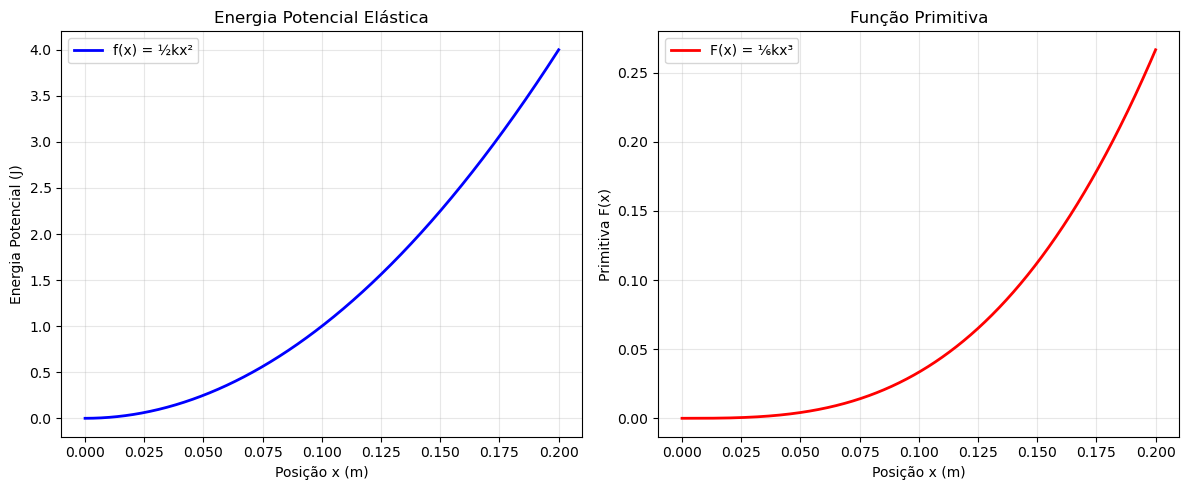

In [79]:
plt.figure(figsize=(12, 5))

# Gráfico da função f(x)
plt.subplot(1, 2, 1)
plt.plot(x, y_f, 'b-', linewidth=2, label='f(x) = ½kx²')
plt.xlabel('Posição x (m)')
plt.ylabel('Energia Potencial (J)')
plt.title('Energia Potencial Elástica')
plt.grid(True, alpha=0.3)
plt.legend()

# Gráfico da primitiva
plt.subplot(1, 2, 2)
plt.plot(x, y_primitiva, 'r-', linewidth=2, label='F(x) = ⅙kx³')
plt.xlabel('Posição x (m)')
plt.ylabel('Primitiva F(x)')
plt.title('Função Primitiva')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.savefig('questao1_funcoes.png', dpi=300, bbox_inches='tight')
plt.show()

In [80]:
valor_exato = primitiva_f(b, k) - primitiva_f(a, k)
print(f"Valor exato da integral (usando primitiva): {valor_exato:.8f} J")

Valor exato da integral (usando primitiva): 0.26666667 J


In [81]:
print("\nb) Integração pela regra do trapézio")
n = 10
integral_trapezio = regra_trapezio(f, a, b, n, k)
erro_trapezio = abs(integral_trapezio - valor_exato)


b) Integração pela regra do trapézio


In [82]:
print(f"Integral pelo trapézio (n={n}): {integral_trapezio:.8f} J")
print(f"Erro absoluto: {erro_trapezio:.8f} J")
print(f"Erro relativo: {erro_trapezio/valor_exato*100:.4f}%")

Integral pelo trapézio (n=10): 0.26800000 J
Erro absoluto: 0.00133333 J
Erro relativo: 0.5000%


In [83]:
integral_simpson = regra_simpson(f, a, b, n, k)
erro_simpson = abs(integral_simpson - valor_exato)

print(f"Integral por Simpson (n={n}): {integral_simpson:.8f} J")
print(f"Erro absoluto: {erro_simpson:.8f} J")
print(f"Erro relativo: {erro_simpson/valor_exato*100:.4f}%")

Integral por Simpson (n=10): 0.26666667 J
Erro absoluto: 0.00000000 J
Erro relativo: 0.0000%


In [84]:
if erro_simpson < erro_trapezio:
    print("Simpson se mostrou mais preciso que o trapézio.")
else:
    print("Trapézio se mostrou mais preciso que Simpson.")

Simpson se mostrou mais preciso que o trapézio.


In [85]:
n_valores = [10, 100, 1000]
resultados_convergencia = []

for n in n_valores:
    trap = regra_trapezio(f, a, b, n, k)
    simp = regra_simpson(f, a, b, n, k)
    erro_trap = abs(trap - valor_exato)
    erro_simp = abs(simp - valor_exato)
    
    resultados_convergencia.append({
        'n': n,
        'trapezio': trap,
        'simpson': simp,
        'erro_trapezio': erro_trap,
        'erro_simpson': erro_simp
    })
    
    print(f"n = {n:4d}: Trapézio = {trap:.8f}, Simpson = {simp:.8f}")
    print(f"         Erro Trap = {erro_trap:.2e}, Erro Simp = {erro_simp:.2e}")

n =   10: Trapézio = 0.26800000, Simpson = 0.26666667
         Erro Trap = 1.33e-03, Erro Simp = 1.11e-16
n =  100: Trapézio = 0.26668000, Simpson = 0.26666667
         Erro Trap = 1.33e-05, Erro Simp = 1.11e-16
n = 1000: Trapézio = 0.26666680, Simpson = 0.26666667
         Erro Trap = 1.33e-07, Erro Simp = 1.11e-16


In [86]:
df_conv = pd.DataFrame(resultados_convergencia)

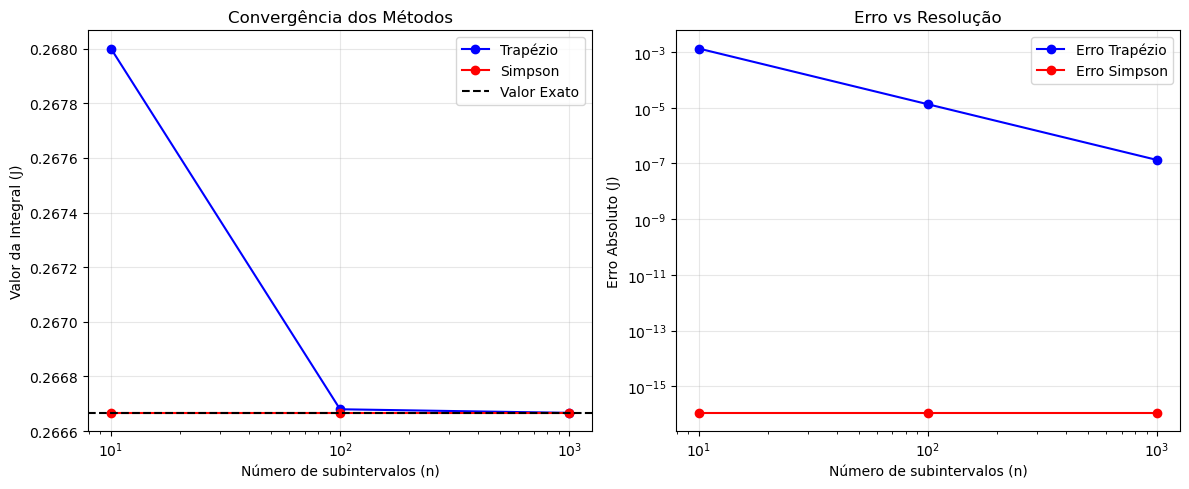

In [87]:
plt.figure(figsize=(12, 5))
    
# Gráfico dos valores das integrais
plt.subplot(1, 2, 1)
plt.semilogx(df_conv['n'], df_conv['trapezio'], 'bo-', label='Trapézio')
plt.semilogx(df_conv['n'], df_conv['simpson'], 'ro-', label='Simpson')
plt.axhline(y=valor_exato, color='k', linestyle='--', label='Valor Exato')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Valor da Integral (J)')
plt.title('Convergência dos Métodos')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico dos erros em escala logarítmica
plt.subplot(1, 2, 2)
plt.loglog(df_conv['n'], df_conv['erro_trapezio'], 'bo-', label='Erro Trapézio')
plt.loglog(df_conv['n'], df_conv['erro_simpson'], 'ro-', label='Erro Simpson')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Erro Absoluto (J)')
plt.title('Erro vs Resolução')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('questao1_convergencia.png', dpi=300, bbox_inches='tight')
plt.show()

In [88]:
resultados_adaptativo = simpson_adaptativo(f, a, b, k, epsilon=1e-6, n_inicial=2)

print(f"\nMétodo adaptativo convergiu em {len(resultados_adaptativo)} iterações")
resultado_final = resultados_adaptativo[-1]
print(f"Resultado final: {resultado_final['integral']:.8f} J")
print(f"Erro em relação ao valor exato: {abs(resultado_final['integral'] - valor_exato):.2e} J")

n =    2, Integral = 0.26666667, Erro estimado = 0.00e+00

Método adaptativo convergiu em 1 iterações
Resultado final: 0.26666667 J
Erro em relação ao valor exato: 5.55e-17 J


In [89]:
with open('resultados_questao1.txt', 'w') as arquivo:
        arquivo.write("RESULTADOS DA QUESTÃO 1 - ENERGIA POTENCIAL ELÁSTICA\n")
        arquivo.write("="*60 + "\n\n")
        arquivo.write(f"Constante elástica k = {k} N/m\n")
        arquivo.write(f"Intervalo de integração: [{a}, {b}] m\n\n")
        arquivo.write(f"Valor exato da integral: {valor_exato:.8f} J\n\n")
        arquivo.write("Resultados dos métodos numéricos:\n")
        arquivo.write("-" * 40 + "\n")
        for resultado in resultados_convergencia:
            arquivo.write(f"n = {resultado['n']:4d}:\n")
            arquivo.write(f"  Trapézio: {resultado['trapezio']:.8f} J (erro: {resultado['erro_trapezio']:.2e})\n")
            arquivo.write(f"  Simpson:  {resultado['simpson']:.8f} J (erro: {resultado['erro_simpson']:.2e})\n\n")
        
        arquivo.write("Método adaptativo de Simpson:\n")
        arquivo.write("-" * 40 + "\n")
        for i, res in enumerate(resultados_adaptativo):
            arquivo.write(f"Iteração {i+1}: n = {res['n']:4d}, Integral = {res['integral']:.8f}, Erro estimado = {res['erro_estimado']:.2e}\n")

In [90]:
f, primitiva, primitiva_simp = calcular_primitiva_simbolica()

CÁLCULO SIMBÓLICO DA PRIMITIVA
Função original: f(x) = k*x**2/2
Primitiva F(x) = ∫f(x)dx = k*x**3/6
Primitiva simplificada: F(x) = k*x**3/6

Verificação - dF/dx = k*x**2/2
Função original:     k*x**2/2
Verificação: dF/dx = f(x)? True


In [91]:
resultado_tfc, resultado_direto = calcular_integral_definida_simbolica()


CÁLCULO DA INTEGRAL DEFINIDA
Calculando ∫[0 a 1/5] f(x) dx
onde f(x) = k*x**2/2
e F(x) = k*x**3/6

Pelo Teorema Fundamental do Cálculo:
∫[0 a 1/5] f(x) dx = F(1/5) - F(0)
                    = k/750 - 0
                    = k/750

Com k = 200 N/m:
∫[0 a 0.2] f(x) dx = 4/15
                   = 0.26666667 J

Verificação com integração direta:
∫[0 a 0.2] f(x) dx = 4/15
                   = 0.26666667 J

Diferença entre métodos: 0.0


In [92]:
demonstracao_teorema_fundamental()


DEMONSTRAÇÃO DO TEOREMA FUNDAMENTAL DO CÁLCULO
O Teorema Fundamental do Cálculo estabelece que:
Se F(x) é uma primitiva de f(x), então:
∫[a,b] f(x) dx = F(b) - F(a)

Para nossa função: f(x) = k*x**2/2
Primitiva: F(x) = k*x**3/6

Verificação que F'(x) = f(x):
F'(x) = d/dx(k*x**3/6) = k*x**2/2
f(x) = k*x**2/2
F'(x) = f(x)? True ✓

Aplicando o teorema com a = 0 e b = 0.2:
∫[0,0.2] f(x) dx = F(0.2) - F(0)
F(0.2) = k/750
F(0) = 0
F(0.2) - F(0) = k/750 - 0 = k/750

Com k = 200 N/m:
∫[0,0.2] f(x) dx = 4/15 = 0.26666667 J


In [93]:
valor_exato = comparar_com_implementacao_numerica()


COMPARAÇÃO COM MÉTODOS NUMÉRICOS
Valor exato (simbólico): 0.2666666667 J

Comparação com Simpson numérico:
n		Resultado		Erro Absoluto
--------------------------------------------------
    10		0.2666666667	5.55e-17
   100		0.2666666667	5.55e-17
  1000		0.2666666667	5.55e-17
 10000		0.2666666667	5.55e-17



VISUALIZAÇÃO DA FUNÇÃO E PRIMITIVA


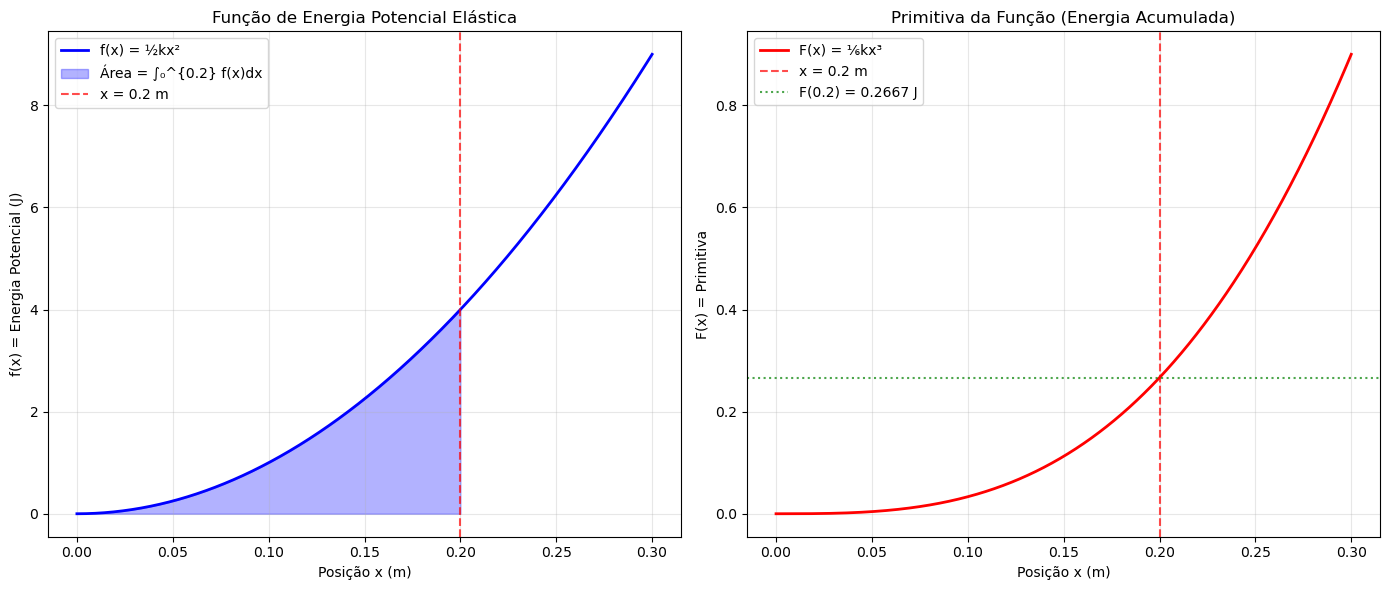

Gráfico salvo como 'primitiva_simbolica.png'


In [94]:
visualizar_funcao_e_primitiva()

In [95]:
print("\n" + "="*60)
print("RESUMO FINAL")
print("="*60)
print(f"Função: f(x) = ½kx²")
print(f"Primitiva: F(x) = ⅙kx³")
print(f"Integral definida [0, 0.2]: {valor_exato:.8f} J")
print(f"Interpretação física: Energia potencial elástica armazenada")
print("="*60)


RESUMO FINAL
Função: f(x) = ½kx²
Primitiva: F(x) = ⅙kx³
Integral definida [0, 0.2]: 0.26666667 J
Interpretação física: Energia potencial elástica armazenada


# Questao 2

In [96]:
def psi(r):
    """Função de onda 1s do hidrogênio normalizada: Ψ(r) = 2e^(-r)"""
    return 2 * np.exp(-r)

In [97]:
def densidade_probabilidade_radial(r):
    """Densidade de probabilidade radial: P(r) = r²|Ψ(r)|² = 4r²e^(-2r)"""
    return 4 * r**2 * np.exp(-2*r)

In [98]:
def densidade_probabilidade_2d(x, y):
    """Densidade de probabilidade no plano: P(x,y) = |Ψ(r)|² = 4e^(-2r)"""
    r = np.sqrt(x**2 + y**2)
    return 4 * np.exp(-2*r)


In [99]:
def regra_simpson(func, a, b, n):
    """Implementa a regra de Simpson para integração numérica"""
    if n % 2 != 0:
        n += 1  # Garantir que n seja par
    
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    
    # Aplicar regra de Simpson
    integral = h/3 * (y[0] + 4*np.sum(y[1::2]) + 2*np.sum(y[2:-1:2]) + y[-1])
    return integral

In [100]:
def quadratura_gaussiana(func, a, b, n_pontos=20):
    """
    Implementa quadratura gaussiana usando transformação linear
    para mapear o intervalo [a,b] para [-1,1]
    """
    # Obter pontos e pesos de Gauss-Legendre
    pontos, pesos = roots_legendre(n_pontos)
    
    # Transformar do intervalo [-1,1] para [a,b]
    pontos_transformados = 0.5 * (b - a) * pontos + 0.5 * (b + a)
    
    # Calcular a integral
    integral = 0.5 * (b - a) * np.sum(pesos * func(pontos_transformados))
    
    return integral

In [101]:
def encontrar_raio_probabilidade(prob_alvo, metodo='simpson', n=1000, r_max=20):
    """
    Encontra o raio r onde a probabilidade acumulada atinge prob_alvo
    usando busca binária
    """
    def prob_acumulada(r_limite):
        if metodo == 'simpson':
            return regra_simpson(densidade_probabilidade_radial, 0, r_limite, n)
        elif metodo == 'gaussiana':
            return quadratura_gaussiana(densidade_probabilidade_radial, 0, r_limite, n//50)
    
    # Busca binária
    r_min, r_max = 0, r_max
    tolerancia = 1e-3
    
    while r_max - r_min > tolerancia:
        r_meio = (r_min + r_max) / 2
        prob_atual = prob_acumulada(r_meio)
        
        if prob_atual < prob_alvo:
            r_min = r_meio
        else:
            r_max = r_meio
    
    return (r_min + r_max) / 2

In [102]:
r_max = 20 
normalizacao_simpson = regra_simpson(densidade_probabilidade_radial, 0, r_max, 2000)
normalizacao_gaussiana = quadratura_gaussiana(densidade_probabilidade_radial, 0, r_max, 50)
valor_analitico_norm = 1.0

In [103]:
print(f"Normalização (Simpson, n=2000): {normalizacao_simpson:.8f}")
print(f"Normalização (Gaussiana, 50 pontos): {normalizacao_gaussiana:.8f}")
print(f"Valor esperado: {valor_analitico_norm:.8f}")
print(f"Erro Simpson: {abs(normalizacao_simpson - valor_analitico_norm):.2e}")
print(f"Erro Gaussiana: {abs(normalizacao_gaussiana - valor_analitico_norm):.2e}")

Normalização (Simpson, n=2000): 1.00000000
Normalização (Gaussiana, 50 pontos): 1.00000000
Valor esperado: 1.00000000
Erro Simpson: 2.67e-09
Erro Gaussiana: 1.11e-16


In [104]:
if abs(normalizacao_gaussiana - valor_analitico_norm) < abs(normalizacao_simpson - valor_analitico_norm):
    print("Quadratura gaussiana se mostrou mais precisa para normalização.")
else:
    print("Simpson se mostrou mais preciso para normalização.")

Quadratura gaussiana se mostrou mais precisa para normalização.


In [105]:
r_limite = 2.0
prob_2bohr_simpson = regra_simpson(densidade_probabilidade_radial, 0, r_limite, 1000)
prob_2bohr_gaussiana = quadratura_gaussiana(densidade_probabilidade_radial, 0, r_limite, 30)

valor_analitico_2bohr = 1 - 13 * np.exp(-4)

In [106]:
print(f"Probabilidade até 2 Bohr (Simpson): {prob_2bohr_simpson:.6f}")
print(f"Probabilidade até 2 Bohr (Gaussiana): {prob_2bohr_gaussiana:.6f}")
print(f"Valor analítico: {valor_analitico_2bohr:.6f}")
print(f"Erro Simpson: {abs(prob_2bohr_simpson - valor_analitico_2bohr):.2e}")
print(f"Erro Gaussiana: {abs(prob_2bohr_gaussiana - valor_analitico_2bohr):.2e}")

Probabilidade até 2 Bohr (Simpson): 0.761897
Probabilidade até 2 Bohr (Gaussiana): 0.761897
Valor analítico: 0.761897
Erro Simpson: 4.29e-12
Erro Gaussiana: 1.78e-15


In [107]:
print(f"\nInterpretação física: {prob_2bohr_simpson*100:.1f}% do elétron está dentro de 2 Bohr do núcleo.")
if prob_2bohr_simpson > 0.5:
    print("O elétron está mais confinado nas proximidades do núcleo.")
else:
    print("O elétron está mais espalhado.")


Interpretação física: 76.2% do elétron está dentro de 2 Bohr do núcleo.
O elétron está mais confinado nas proximidades do núcleo.


In [108]:
r_95_simpson = encontrar_raio_probabilidade(0.95, 'simpson', 1000, 15)
r_95_gaussiana = encontrar_raio_probabilidade(0.95, 'gaussiana', 1000, 15)

r_99_simpson = encontrar_raio_probabilidade(0.99, 'simpson', 1000, 20)
r_99_gaussiana = encontrar_raio_probabilidade(0.99, 'gaussiana', 1000, 20)

In [109]:
print(f"Raio para 95% (Simpson): {r_95_simpson:.1f} Bohr")
print(f"Raio para 95% (Gaussiana): {r_95_gaussiana:.1f} Bohr")
print(f"Raio para 99% (Simpson): {r_99_simpson:.1f} Bohr")
print(f"Raio para 99% (Gaussiana): {r_99_gaussiana:.1f} Bohr")

print(f"\nDistribuição espacial: 95% do elétron está dentro de ~{r_95_simpson:.1f} Bohr")
print(f"                      99% do elétron está dentro de ~{r_99_simpson:.1f} Bohr")

Raio para 95% (Simpson): 3.1 Bohr
Raio para 95% (Gaussiana): 3.1 Bohr
Raio para 99% (Simpson): 4.2 Bohr
Raio para 99% (Gaussiana): 4.2 Bohr

Distribuição espacial: 95% do elétron está dentro de ~3.1 Bohr
                      99% do elétron está dentro de ~4.2 Bohr


In [110]:
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = densidade_probabilidade_2d(X, Y)

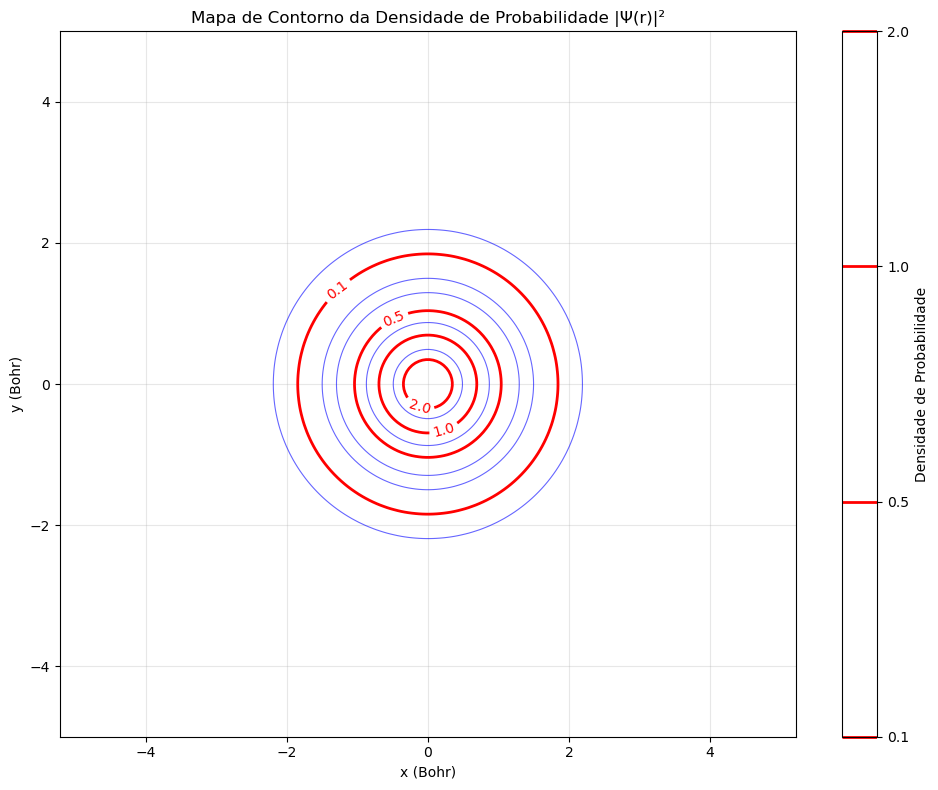

In [111]:
plt.figure(figsize=(10, 8))

# Níveis de contorno
niveis_principais = [0.1, 0.5, 1.0, 2.0]
niveis_secundarios = [0.05, 0.2, 0.3, 0.7, 1.5]

# Plotar contornos
contornos_principais = plt.contour(X, Y, Z, levels=niveis_principais, 
                                    colors='red', linewidths=2)
contornos_secundarios = plt.contour(X, Y, Z, levels=niveis_secundarios, 
                                    colors='blue', linewidths=0.8, alpha=0.6)

# Adicionar labels aos contornos principais
plt.clabel(contornos_principais, inline=True, fontsize=10, fmt='%.1f')

# Configurar gráfico
plt.xlabel('x (Bohr)')
plt.ylabel('y (Bohr)')
plt.title('Mapa de Contorno da Densidade de Probabilidade |Ψ(r)|²')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Adicionar colorbar
plt.colorbar(contornos_principais, label='Densidade de Probabilidade')

plt.tight_layout()
plt.savefig('questao2_contorno_final.png', dpi=300, bbox_inches='tight')
plt.show()

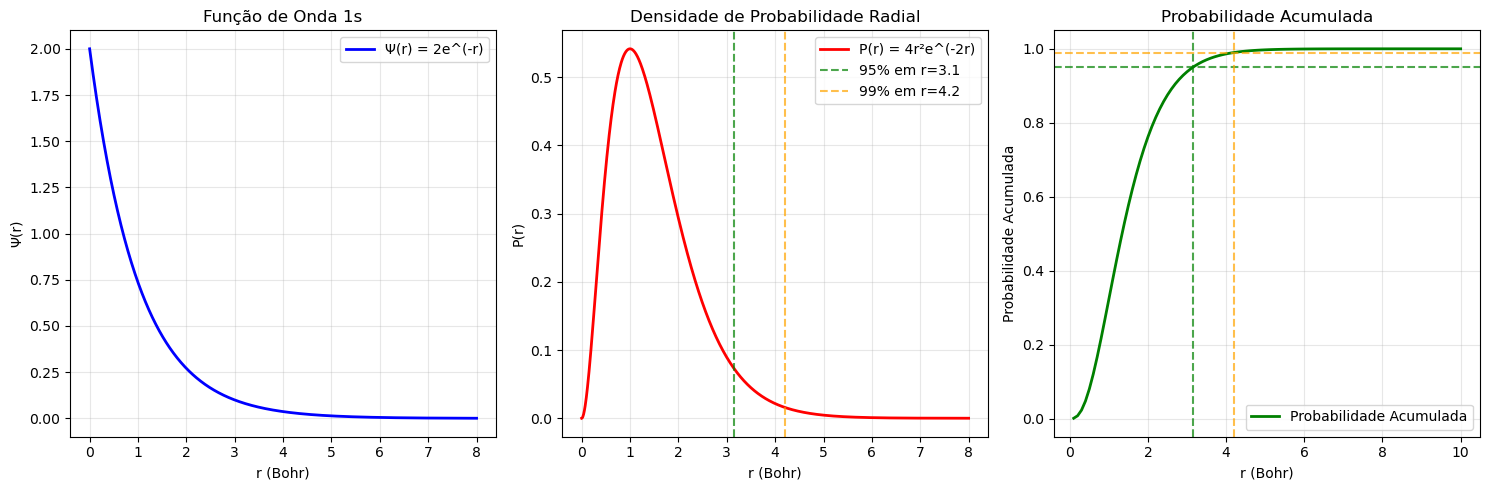

In [112]:
plt.figure(figsize=(15, 5))

# Gráfico da função de onda
plt.subplot(1, 3, 1)
r = np.linspace(0, 8, 1000)
psi_r = psi(r)
plt.plot(r, psi_r, 'b-', linewidth=2, label='Ψ(r) = 2e^(-r)')
plt.xlabel('r (Bohr)')
plt.ylabel('Ψ(r)')
plt.title('Função de Onda 1s')
plt.grid(True, alpha=0.3)
plt.legend()

# Gráfico da densidade de probabilidade radial
plt.subplot(1, 3, 2)
P_r = densidade_probabilidade_radial(r)
plt.plot(r, P_r, 'r-', linewidth=2, label='P(r) = 4r²e^(-2r)')
plt.axvline(x=r_95_simpson, color='g', linestyle='--', alpha=0.7, label=f'95% em r={r_95_simpson:.1f}')
plt.axvline(x=r_99_simpson, color='orange', linestyle='--', alpha=0.7, label=f'99% em r={r_99_simpson:.1f}')
plt.xlabel('r (Bohr)')
plt.ylabel('P(r)')
plt.title('Densidade de Probabilidade Radial')
plt.grid(True, alpha=0.3)
plt.legend()

# Gráfico da probabilidade acumulada
plt.subplot(1, 3, 3)
r_acum = np.linspace(0.1, 10, 100)
prob_acum = [regra_simpson(densidade_probabilidade_radial, 0, r_val, 500) for r_val in r_acum]
plt.plot(r_acum, prob_acum, 'g-', linewidth=2, label='Probabilidade Acumulada')
plt.axhline(y=0.95, color='g', linestyle='--', alpha=0.7)
plt.axhline(y=0.99, color='orange', linestyle='--', alpha=0.7)
plt.axvline(x=r_95_simpson, color='g', linestyle='--', alpha=0.7)
plt.axvline(x=r_99_simpson, color='orange', linestyle='--', alpha=0.7)
plt.xlabel('r (Bohr)')
plt.ylabel('Probabilidade Acumulada')
plt.title('Probabilidade Acumulada')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.savefig('questao2_analise_final.png', dpi=300, bbox_inches='tight')
plt.show()

In [113]:
n_pontos_teste = [10, 20, 30, 50, 100]
resultados_comparacao = []

for n in n_pontos_teste:
    # Simpson
    norm_simp = regra_simpson(densidade_probabilidade_radial, 0, 20, n*20)
    erro_simp = abs(norm_simp - 1.0)
    
    # Gaussiana
    norm_gauss = quadratura_gaussiana(densidade_probabilidade_radial, 0, 20, n)
    erro_gauss = abs(norm_gauss - 1.0)
    
    resultados_comparacao.append({
        'n_pontos': n,
        'simpson_n': n*20,
        'erro_simpson': erro_simp,
        'erro_gaussiana': erro_gauss
    })
    
    print(f"n={n:3d}: Simpson(n={n*20:4d}) erro={erro_simp:.2e}, Gaussiana erro={erro_gauss:.2e}")

n= 10: Simpson(n= 200) erro=2.62e-05, Gaussiana erro=7.73e-03
n= 20: Simpson(n= 400) erro=1.66e-06, Gaussiana erro=4.50e-12
n= 30: Simpson(n= 600) erro=3.29e-07, Gaussiana erro=1.38e-14
n= 50: Simpson(n=1000) erro=4.26e-08, Gaussiana erro=1.11e-16
n=100: Simpson(n=2000) erro=2.67e-09, Gaussiana erro=1.11e-14


In [114]:
with open('resultados_questao2_final.txt', 'w') as arquivo:
    
    arquivo.write("a) Verificação da normalização:\n")
    arquivo.write(f"Simpson (n=2000): {normalizacao_simpson:.8f} (erro: {abs(normalizacao_simpson - 1.0):.2e})\n")
    arquivo.write(f"Gaussiana (50 pts): {normalizacao_gaussiana:.8f} (erro: {abs(normalizacao_gaussiana - 1.0):.2e})\n\n")
    
    arquivo.write("b) Probabilidade até 2 Bohr:\n")
    arquivo.write(f"Simpson: {prob_2bohr_simpson:.6f}\n")
    arquivo.write(f"Gaussiana: {prob_2bohr_gaussiana:.6f}\n")
    arquivo.write(f"Analítico: {valor_analitico_2bohr:.6f}\n\n")
    
    arquivo.write("c) Raios para probabilidades específicas:\n")
    arquivo.write(f"95% - Simpson: {r_95_simpson:.1f} Bohr, Gaussiana: {r_95_gaussiana:.1f} Bohr\n")
    arquivo.write(f"99% - Simpson: {r_99_simpson:.1f} Bohr, Gaussiana: {r_99_gaussiana:.1f} Bohr\n\n")
    
    arquivo.write("Comparação de métodos:\n")
    arquivo.write("-" * 30 + "\n")
    for res in resultados_comparacao:
        arquivo.write(f"n={res['n_pontos']:3d}: Simpson(n={res['simpson_n']:4d}) erro={res['erro_simpson']:.2e}, ")
        arquivo.write(f"Gaussiana erro={res['erro_gaussiana']:.2e}\n")

# Questao 3

In [115]:
def distribuicao_maxwell_boltzmann(v):
    """
    Distribuição de Maxwell-Boltzmann para velocidades moleculares
    f(v) = 4π * (m/(2πkT))^(3/2) * v² * exp(-mv²/(2kT))
    """
    fator = 4 * np.pi * (m_N2 / (2 * np.pi * k_B * T))**(3/2)
    return fator * v**2 * np.exp(-m_N2 * v**2 / (2 * k_B * T))

In [116]:
def energia_cinetica_integrando(v):
    """
    Integrando para energia cinética média: (1/2)mv² * f(v)
    """
    return 0.5 * m_N2 * v**2 * distribuicao_maxwell_boltzmann(v)

In [117]:
def quadratura_gaussiana(func, a, b, n_pontos=20):
    """
    Implementa quadratura gaussiana usando transformação linear
    para mapear o intervalo [a,b] para [-1,1]
    """
    # Obter pontos e pesos de Gauss-Legendre
    pontos, pesos = roots_legendre(n_pontos)
    
    # Transformar do intervalo [-1,1] para [a,b]
    pontos_transformados = 0.5 * (b - a) * pontos + 0.5 * (b + a)
    
    # Calcular a integral
    integral = 0.5 * (b - a) * np.sum(pesos * func(pontos_transformados))
    
    return integral

In [118]:
def regra_trapezio(func, a, b, n):
    """Implementa a regra do trapézio para integração numérica"""
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = func(x)
    
    # Aplicar regra do trapézio
    integral = h * (0.5*y[0] + np.sum(y[1:-1]) + 0.5*y[-1])
    return integral

In [119]:
def romberg(func, a, b, max_iter=10):
    """
    Implementa o método de Romberg para integração numérica
    usando extrapolação de Richardson
    """
    # Matriz para armazenar os valores de Romberg
    R = np.zeros((max_iter, max_iter))
    
    # Primeira coluna: regra do trapézio com diferentes h
    for i in range(max_iter):
        n = 2**i
        R[i, 0] = regra_trapezio(func, a, b, n)
    
    # Extrapolação de Richardson
    for j in range(1, max_iter):
        for i in range(j, max_iter):
            R[i, j] = R[i, j-1] + (R[i, j-1] - R[i-1, j-1]) / (4**j - 1)
    
    # Retornar a matriz R e o melhor valor estimado
    return R, R[max_iter-1, max_iter-1]

In [120]:
def estimar_erro_romberg(R, i, j):
    """Estima o erro do método de Romberg"""
    if i > 0 and j > 0:
        return abs(R[i, j] - R[i-1, j-1])
    return float('inf')

In [121]:
def v_f_v(v):
        return v * distribuicao_maxwell_boltzmann(v)

In [122]:
def v2_f_v(v):
        return v**2 * distribuicao_maxwell_boltzmann(v)

In [123]:
k_B = 1.380649e-23  
m_N2 = 4.65e-26     
T = 300            
v_max = 3000 

In [124]:
normalizacao_gaussiana = quadratura_gaussiana(distribuicao_maxwell_boltzmann, 0, v_max, 50)

R_norm, normalizacao_romberg = romberg(distribuicao_maxwell_boltzmann, 0, v_max, 12)
erro_romberg_norm = estimar_erro_romberg(R_norm, 11, 11)

In [125]:
print(f"Normalização (Gaussiana, 50 pontos): {normalizacao_gaussiana:.8f}")
print(f"Normalização (Romberg, 12 iter): {normalizacao_romberg:.8f}")
print(f"Valor esperado: 1.00000000")
print(f"Erro Gaussiana: {abs(normalizacao_gaussiana - 1.0):.2e}")
print(f"Erro Romberg: {abs(normalizacao_romberg - 1.0):.2e}")
print(f"Erro estimado Romberg: {erro_romberg_norm:.2e}")

if abs(normalizacao_gaussiana - 1.0) < abs(normalizacao_romberg - 1.0):
    print("Quadratura gaussiana se mostrou mais precisa para normalização.")
else:
    print("Romberg se mostrou mais preciso para normalização.")

Normalização (Gaussiana, 50 pontos): 1.00000000
Normalização (Romberg, 12 iter): 1.00000000
Valor esperado: 1.00000000
Erro Gaussiana: 1.78e-15
Erro Romberg: 0.00e+00
Erro estimado Romberg: 1.11e-16
Romberg se mostrou mais preciso para normalização.


In [126]:
energia_gaussiana = quadratura_gaussiana(energia_cinetica_integrando, 0, v_max, 50)

R_energia, energia_romberg = romberg(energia_cinetica_integrando, 0, v_max, 12)
erro_romberg_energia = estimar_erro_romberg(R_energia, 11, 11)

energia_teorica = 1.5 * k_B * T

In [127]:
print(f"Energia cinética média (Gaussiana): {energia_gaussiana:.6e} J")
print(f"Energia cinética média (Romberg): {energia_romberg:.6e} J")
print(f"Valor teórico (3/2)kT: {energia_teorica:.6e} J")
print(f"Erro Gaussiana: {abs(energia_gaussiana - energia_teorica):.2e} J")
print(f"Erro Romberg: {abs(energia_romberg - energia_teorica):.2e} J")
print(f"Erro estimado Romberg: {erro_romberg_energia:.2e} J")

Energia cinética média (Gaussiana): 6.212921e-21 J
Energia cinética média (Romberg): 6.212920e-21 J
Valor teórico (3/2)kT: 6.212921e-21 J
Erro Gaussiana: 1.81e-35 J
Erro Romberg: 1.50e-36 J
Erro estimado Romberg: 3.01e-36 J


In [128]:
faixas = [(0, 200), (200, 500), (500, 1000), (1000, 2000)]

In [129]:
for v_min, v_max_faixa in faixas:
    prob_gaussiana = quadratura_gaussiana(distribuicao_maxwell_boltzmann, v_min, v_max_faixa, 30)
    R_prob, prob_romberg = romberg(distribuicao_maxwell_boltzmann, v_min, v_max_faixa, 10)
    diferenca = abs(prob_gaussiana - prob_romberg)
    
    print(f"{v_min:4d} - {v_max_faixa:4d}              | {prob_gaussiana:.6f} | {prob_romberg:.6f} | {diferenca:.2e}")

   0 -  200              | 0.070070 | 0.070070 | 9.71e-17
 200 -  500              | 0.507524 | 0.507524 | 3.33e-16
 500 - 1000              | 0.411845 | 0.411845 | 2.78e-16
1000 - 2000              | 0.010562 | 0.010562 | 1.84e-16


In [130]:
v_mais_provavel = np.sqrt(2 * k_B * T / m_N2)
v_media = np.sqrt(8 * k_B * T / (np.pi * m_N2))
v_rms = np.sqrt(3 * k_B * T / m_N2)

In [131]:
print(f"Velocidade mais provável: {v_mais_provavel:.1f} m/s")
print(f"Velocidade média: {v_media:.1f} m/s")
print(f"Velocidade RMS: {v_rms:.1f} m/s")

Velocidade mais provável: 422.1 m/s
Velocidade média: 476.3 m/s
Velocidade RMS: 516.9 m/s


In [132]:
v_media_num = quadratura_gaussiana(v_f_v, 0, 3000, 50)
v2_media_num = quadratura_gaussiana(v2_f_v, 0, 3000, 50)
v_rms_num = np.sqrt(v2_media_num)

In [133]:
print(f"\nVerificação numérica:")
print(f"Velocidade média (numérica): {v_media_num:.1f} m/s")
print(f"Velocidade RMS (numérica): {v_rms_num:.1f} m/s")


Verificação numérica:
Velocidade média (numérica): 476.3 m/s
Velocidade RMS (numérica): 516.9 m/s


In [134]:
v = np.linspace(0, 2000, 1000)
f_v = distribuicao_maxwell_boltzmann(v)

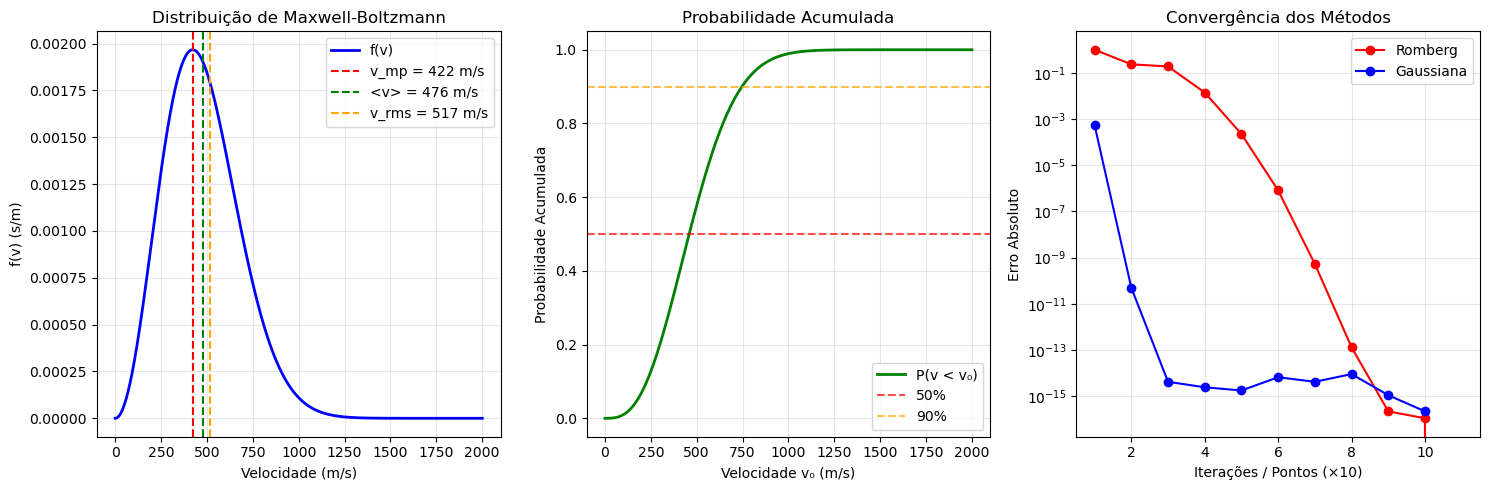

In [135]:
plt.figure(figsize=(15, 5))

# Distribuição de Maxwell-Boltzmann
plt.subplot(1, 3, 1)
plt.plot(v, f_v, 'b-', linewidth=2, label='f(v)')
plt.axvline(x=v_mais_provavel, color='r', linestyle='--', label=f'v_mp = {v_mais_provavel:.0f} m/s')
plt.axvline(x=v_media, color='g', linestyle='--', label=f'<v> = {v_media:.0f} m/s')
plt.axvline(x=v_rms, color='orange', linestyle='--', label=f'v_rms = {v_rms:.0f} m/s')
plt.xlabel('Velocidade (m/s)')
plt.ylabel('f(v) (s/m)')
plt.title('Distribuição de Maxwell-Boltzmann')
plt.legend()
plt.grid(True, alpha=0.3)

# Distribuição acumulada
plt.subplot(1, 3, 2)
v_acum = np.linspace(0, 2000, 100)
prob_acum = [quadratura_gaussiana(distribuicao_maxwell_boltzmann, 0, v_val, 30) for v_val in v_acum]
plt.plot(v_acum, prob_acum, 'g-', linewidth=2, label='P(v < v₀)')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='50%')
plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90%')
plt.xlabel('Velocidade v₀ (m/s)')
plt.ylabel('Probabilidade Acumulada')
plt.title('Probabilidade Acumulada')
plt.legend()
plt.grid(True, alpha=0.3)

# Convergência dos métodos
plt.subplot(1, 3, 3)
iteracoes = range(1, 12)  # Corrigido para evitar índice fora dos limites
erros_romberg = [abs(R_norm[i, i] - 1.0) for i in iteracoes]

# Testar diferentes números de pontos para Gaussiana
pontos_gauss = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
erros_gauss = []
for n in pontos_gauss:
    norm_g = quadratura_gaussiana(distribuicao_maxwell_boltzmann, 0, 3000, n)
    erros_gauss.append(abs(norm_g - 1.0))

plt.semilogy(iteracoes, erros_romberg, 'ro-', label='Romberg')
plt.semilogy(range(1, len(pontos_gauss)+1), erros_gauss, 'bo-', label='Gaussiana')
plt.xlabel('Iterações / Pontos (×10)')
plt.ylabel('Erro Absoluto')
plt.title('Convergência dos Métodos')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('questao3_maxwell_boltzmann.png', dpi=300, bbox_inches='tight')
plt.show()

In [136]:
limites = [1000, 2000, 3000, 4000, 5000]
resultados_estabilidade = []

for limite in limites:
    norm_g = quadratura_gaussiana(distribuicao_maxwell_boltzmann, 0, limite, 50)
    R_temp, norm_r = romberg(distribuicao_maxwell_boltzmann, 0, limite, 10)
    
    resultados_estabilidade.append({
        'limite': limite,
        'gaussiana': norm_g,
        'romberg': norm_r,
        'erro_g': abs(norm_g - 1.0),
        'erro_r': abs(norm_r - 1.0)
    })
    
    print(f"Limite {limite:4d} m/s: Gauss={norm_g:.6f} (erro={abs(norm_g-1.0):.2e}), "
            f"Romberg={norm_r:.6f} (erro={abs(norm_r-1.0):.2e})")

Limite 1000 m/s: Gauss=0.989438 (erro=1.06e-02), Romberg=0.989438 (erro=1.06e-02)
Limite 2000 m/s: Gauss=1.000000 (erro=9.69e-10), Romberg=1.000000 (erro=9.69e-10)
Limite 3000 m/s: Gauss=1.000000 (erro=1.78e-15), Romberg=1.000000 (erro=2.22e-16)
Limite 4000 m/s: Gauss=1.000000 (erro=8.88e-16), Romberg=1.000000 (erro=1.11e-14)
Limite 5000 m/s: Gauss=1.000000 (erro=6.66e-16), Romberg=1.000000 (erro=8.28e-14)


In [137]:
with open('resultados_questao3.txt', 'w') as arquivo:
    arquivo.write("RESULTADOS DA QUESTÃO 3 - DISTRIBUIÇÃO DE MAXWELL-BOLTZMANN\n")
    arquivo.write("="*70 + "\n\n")
    
    arquivo.write("Problema físico: Distribuição de velocidades moleculares\n")
    arquivo.write(f"Sistema: Moléculas de N₂ a T = {T} K\n")
    arquivo.write(f"Massa molecular: {m_N2:.2e} kg\n\n")
    
    arquivo.write("a) Verificação da normalização:\n")
    arquivo.write(f"Gaussiana (50 pts): {normalizacao_gaussiana:.8f} (erro: {abs(normalizacao_gaussiana - 1.0):.2e})\n")
    arquivo.write(f"Romberg (12 iter): {normalizacao_romberg:.8f} (erro: {abs(normalizacao_romberg - 1.0):.2e})\n\n")
    
    arquivo.write("b) Energia cinética média:\n")
    arquivo.write(f"Gaussiana: {energia_gaussiana:.6e} J\n")
    arquivo.write(f"Romberg: {energia_romberg:.6e} J\n")
    arquivo.write(f"Teórico: {energia_teorica:.6e} J\n\n")
    
    arquivo.write("c) Velocidades características:\n")
    arquivo.write(f"Mais provável: {v_mais_provavel:.1f} m/s\n")
    arquivo.write(f"Média: {v_media:.1f} m/s (numérica: {v_media_num:.1f} m/s)\n")
    arquivo.write(f"RMS: {v_rms:.1f} m/s (numérica: {v_rms_num:.1f} m/s)\n\n")
    
    arquivo.write("d) Análise de estabilidade:\n")
    for res in resultados_estabilidade:
        arquivo.write(f"Limite {res['limite']:4d} m/s: Gauss erro={res['erro_g']:.2e}, Romberg erro={res['erro_r']:.2e}\n")

In [138]:
print("\ng) Discussão dos resultados")
print("-" * 50)
print("1. Eficiência dos métodos:")
if abs(normalizacao_gaussiana - 1.0) < abs(normalizacao_romberg - 1.0):
    print("   - Quadratura gaussiana mostrou-se mais eficiente para este problema")
else:
    print("   - Romberg mostrou-se mais eficiente para este problema")

print("2. Estabilidade numérica:")
print("   - Ambos os métodos são estáveis para diferentes limites de integração")
print("   - A convergência é rápida devido ao decaimento exponencial da função")

print("3. Interpretação física:")
print(f"   - A energia cinética média ({energia_gaussiana:.2e} J) está próxima do valor teórico")
print(f"   - As velocidades características estão na faixa esperada para N₂ a {T} K")
print("   - A distribuição mostra que a maioria das moléculas tem velocidades moderadas")


g) Discussão dos resultados
--------------------------------------------------
1. Eficiência dos métodos:
   - Romberg mostrou-se mais eficiente para este problema
2. Estabilidade numérica:
   - Ambos os métodos são estáveis para diferentes limites de integração
   - A convergência é rápida devido ao decaimento exponencial da função
3. Interpretação física:
   - A energia cinética média (6.21e-21 J) está próxima do valor teórico
   - As velocidades características estão na faixa esperada para N₂ a 300 K
   - A distribuição mostra que a maioria das moléculas tem velocidades moderadas
